In [1]:
import os
from os import listdir
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import csv

In [19]:
TRAIN_DATA_FOLDER = 'plant_data/plant-seedlings-classification/train'
TEST_DATA_FOLDER = 'plant_data/plant-seedlings-classification/test'

In [35]:
# all_images is a dictionary mapping of each class_label to its list of images in its respective folder

train_images = {}
for class_label in os.listdir(TRAIN_DATA_FOLDER):
    folder_path = os.path.join(TRAIN_DATA_FOLDER, class_label)
    train_images[class_label] = {}
    noOfPic = 0
    for image in glob(os.path.join(folder_path, "*.png")):
        imageName = os.path.basename(image)
        #reduce bias by ensuring that the training data is equally distributed. 
        image_bgr = cv2.imread(image, cv2.IMREAD_COLOR)
        image_bgr = cv2.resize(image_bgr, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
        train_images[class_label][imageName] = image_bgr
        noOfPic += 1
#     print(all_images[class_label][0])

In [30]:
# all_images is a dictionary mapping of each class_label to its list of images in its respective folder

test_images = {}
for image in glob(os.path.join(TEST_DATA_FOLDER, "*.png")):
    imageName = os.path.basename(image)
    #reduce bias by ensuring that the training data is equally distributed. 
    image_bgr = cv2.imread(image, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    test_images[imageName] = image_bgr
#     print(all_images[class_label][0])

In [7]:
labels = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen",
          "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", 
          "Sugar beet"]

In [8]:
# Copied functions to alter the image to better identify the plant from the background

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [25]:
def drawImage(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(train_images[labels[label]][n])
            n += 1    
            
def drawImageMask(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            image = train_images[labels[label]][n]
            image_mask = create_mask_for_plant(image)
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(image_mask)
            n += 1    
            
def drawImagePlantSegmented(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            image = train_images[labels[label]][n]
            image_plant_segmented = segment_plant(image)
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(image_plant_segmented)
            n += 1     

In [41]:
def convertImage(image, imageName, path):
    image_plant_segmented = segment_plant(image)
    print(path+"/"+imageName)
    cv2.imwrite(path+"/"+imageName, image_plant_segmented)

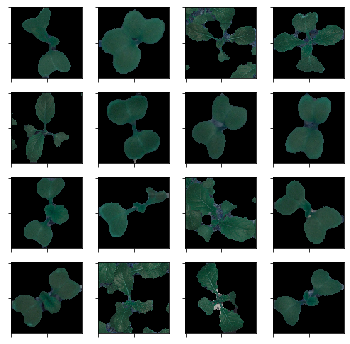

In [10]:
drawImagePlantSegmented(1, 4, 4)

In [39]:
OUTPUT_TRAIN_DATA_FOLDER = 'plant_data/plant-seedlings-classification/train_segmented'
OUTPUT_TEST_DATA_FOLDER = 'plant_data/plant-seedlings-classification/test_segmented'

In [44]:
for label in labels:
    os.mkdir(OUTPUT_TRAIN_DATA_FOLDER+"/"+label)
    for key in train_images[label].keys():
        convertImage(train_images[label][key], key, OUTPUT_TRAIN_DATA_FOLDER+"/"+label)

plant_data/plant-seedlings-classification/train_segmented/Black-grass/0050f38b3.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0183fdf68.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0260cffa8.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/05eedce4d.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/075d004bc.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/078eae073.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/082314602.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0ace21089.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0b228a6b8.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0b3e7a7a9.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0bb75ded8.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/0be707

plant_data/plant-seedlings-classification/train_segmented/Black-grass/a03bc7b24.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a0405de4d.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a08892355.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a0baf5f7b.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a1cb5a321.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a20b64ac6.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a26cb8017.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a37d61200.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a47cfeec4.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a53088ca0.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a5f23b59f.png
plant_data/plant-seedlings-classification/train_segmented/Black-grass/a6f939

plant_data/plant-seedlings-classification/train_segmented/Charlock/32fc83278.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/34842c4a1.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/34ada5879.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/34dab243e.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/350a133fe.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/35e06a98d.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/363fbba0d.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/36fad6f5d.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/385a498a1.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/3981b625f.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/3ac96f88f.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/3b2ae0151.png
plant_data/plant-seedlings-c

plant_data/plant-seedlings-classification/train_segmented/Charlock/89b586174.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/89b84d6e9.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8b35222d0.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8b3f0fba7.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8c9c6b343.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8cc7a03c6.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8d16914a3.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8dd1dbca2.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8de73f114.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8df0f80e9.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/8f4d248bd.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/903fff84f.png
plant_data/plant-seedlings-c

plant_data/plant-seedlings-classification/train_segmented/Charlock/ead0df392.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/eb9d116cf.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ec205ced8.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ec48facfa.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ec615729c.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ec84cacfe.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ed260e354.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/eda5cd97f.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ee111c2ae.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/ee4a02bf9.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/eeee1a97b.png
plant_data/plant-seedlings-classification/train_segmented/Charlock/eeee9e96c.png
plant_data/plant-seedlings-c

plant_data/plant-seedlings-classification/train_segmented/Cleavers/6c10be2a7.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/6cd9902c0.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/6cead585f.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/6e0fa9bcc.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/750c447e0.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/75371625f.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/77e4bee70.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/78dde1704.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/794b914bf.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/796b61337.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/7a9efaf6c.png
plant_data/plant-seedlings-classification/train_segmented/Cleavers/7b257e388.png
plant_data/plant-seedlings-c

plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/00d33935c.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/0118f1f70.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/017a3000a.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/019c3bbea.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/01eef6041.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/024b144e3.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/02ad544a4.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/02beb950e.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/0331a0d41.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/0366e36eb.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/036eca712.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/2e5123448.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/2e795ccf1.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/2f60156c7.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/2f963cc5b.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/301114e3e.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/303835197.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/306e7dbd9.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/30a166665.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/310656b36.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/31b2aa8b5.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/32077f532.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6abbe7528.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6afe50f7c.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6b392ca91.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6b6df19b2.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6c2a49621.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6cc932059.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6d993edb1.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6dcb4a699.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6e64646e7.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/6f6c3d6aa.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/70031d587.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/ac0b860c4.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/ac85f848f.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/acca2b10d.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/ad2df5fa3.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/ad5906a2f.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/adf3032af.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/ae7415e25.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/af005febb.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/af98e2c11.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/afeabc763.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/b0b543038.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fa468d955.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fb78383ae.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fcceab9ee.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fcfb8df3d.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fd08aae02.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fe03224a0.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fe1092cd5.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fe7373785.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/fe801c9c0.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/feafa22cc.png
plant_data/plant-seedlings-classification/train_segmented/Common Chickweed/feb7699d0.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Common wheat/a8409b0a0.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/a86689d83.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/a9bda6650.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/aa7edaf4c.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/aabd29f32.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/ab414e606.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/ab8a5145f.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/ac564c384.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/ac8a31903.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/aea5d6bb9.png
plant_data/plant-seedlings-classification/train_segmented/Common wheat/b032c75ba.png
plant_data/plant-seedlings-classification/train_segmented/Common 

plant_data/plant-seedlings-classification/train_segmented/Fat Hen/268e72cee.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2719ff172.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2760cb984.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/27d310b2a.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/28fad5a34.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2918206b5.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/295ddd0b8.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2a56e7fec.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2b16fb022.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2b17dc2ba.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2c25bee0b.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/2cab73c25.png
plant_data/plant-seedlings-classificatio

plant_data/plant-seedlings-classification/train_segmented/Fat Hen/6f7c00476.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/7026b68e9.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/704b0fe2c.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/7085a144b.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/70f84707a.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/7195021a5.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/72103b235.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/73600b4ed.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/75739ff4d.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/7637818c7.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/765502bd2.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/7678bf0c5.png
plant_data/plant-seedlings-classificatio

plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d09f9b311.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d0c3b7610.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d10feb105.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d199b75a6.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d1d6c2904.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d210b0125.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d233d03bb.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d2434e784.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d2e16e332.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d3e5f8c5e.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d402cc5ca.png
plant_data/plant-seedlings-classification/train_segmented/Fat Hen/d47349f62.png
plant_data/plant-seedlings-classificatio

plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/26f6c56c0.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/273a79f87.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/2773b77ab.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/278d7ff5d.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/27b301a16.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/280af96c0.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/281f52467.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/298d541a6.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/299fcd56d.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/29b0930d2.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/2a62cd782.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/667950000.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/68085b562.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/685074d33.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/6850ccd12.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/69505e138.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/698877cd3.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/698ce4468.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/69a3ef92d.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/6a6b4d0ad.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/6aa8cc9d9.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/6ad2ae242.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a5bb0ae6a.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a5e621f3f.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a60d26781.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a6c5cd3b8.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a719f6d93.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a7467a0ae.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a8085a6fc.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a89d6d72f.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a905c1080.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a954a2f55.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/a9600a185.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/eca81d5e8.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/ed443bd4c.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/eda07616f.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/ee23cb68c.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/ee4a45967.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/ee72ab40b.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/eeddd27da.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/efd3b6718.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/f099e9a3c.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/f1a620ad7.png
plant_data/plant-seedlings-classification/train_segmented/Loose Silky-bent/f25b51762.png
plant_data/plant-seed

plant_data/plant-seedlings-classification/train_segmented/Maize/85ae913c3.png
plant_data/plant-seedlings-classification/train_segmented/Maize/85c25b5a2.png
plant_data/plant-seedlings-classification/train_segmented/Maize/87a3254c9.png
plant_data/plant-seedlings-classification/train_segmented/Maize/87bbc41eb.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8a257f6f6.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8bfe6860d.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8c6fba454.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8c70f6c91.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8c71f9b84.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8caddf555.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8cd93b279.png
plant_data/plant-seedlings-classification/train_segmented/Maize/8d2004e7a.png
plant_data/plant-seedlings-classification/train_segmented/Maize/

plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/195397e91.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1968974c8.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/198f88ef2.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1a570b7db.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1ab17251b.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1ae3fa200.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1c0322399.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1c5665dde.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1c6e51b29.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1c9b1eb8b.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/1ea513913.png
plant_data

plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/425efb679.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/4277f2371.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/43442896c.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/4358bc332.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/4408bae35.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/447b46d12.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/4487c184f.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/44e7a9365.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/45d74776a.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/4646a4ae6.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/478505edb.png
plant_data

plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/96c6d3af6.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/97ea07cab.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/98317755c.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/991bc45af.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/9985f08e7.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/99ec6cf98.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/99f32c27f.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/9a9058dd6.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/9ab3b61db.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/9b32813c0.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/9b40fd5b4.png
plant_data

plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/ef23c4d59.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/ef6841bdb.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/efdb1fd72.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f0c068cc9.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f0fcd1a29.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f12c028d0.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f20fced05.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f2e756037.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f3f60c384.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f44371b31.png
plant_data/plant-seedlings-classification/train_segmented/Scentless Mayweed/f52937aa1.png
plant_data

plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/4f1efce37.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/500bc803a.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/500bd1f17.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/50ef0e765.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/52e1bd10e.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/52f0b365d.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/53a5c74cd.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/5512ca7ba.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/557c7a2aa.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/56cfc17ec.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/57c4a1666.png
plant_data/plant-seedlings-class

plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/f927e469b.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/f981da6df.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fbc21a114.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fd0d400b6.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fdd0a59e3.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fe0f1b30d.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fe2bf1883.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/fe3bcb925.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/ff46c64b4.png
plant_data/plant-seedlings-classification/train_segmented/Shepherds Purse/ffb54800c.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/003402ea0.png
plant_data/plant-seedl

plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2acee6217.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2b03e0abc.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2bf465881.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2bfbed251.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2d2397456.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2d70e8f87.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2db36f1a0.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2e03bc81d.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2e1dc6e23.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/2ed7d6a89.png
plant_data/plant-see

plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/55c8528fe.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/55f1cad85.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5861480ff.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/58e22d25a.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5a2274460.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5a4584b98.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5b0a87abf.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5b7582e22.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5d1f49b75.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/5da2c0d45.png
plant_data/plant-see

plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/9f4b3c440.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/9f87371b2.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/9fb65eb5d.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/9fe156262.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a06803452.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a092428cd.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a0b1ab201.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a11144563.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a134e87e9.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/a17451743.png
plant_data/plant-see

plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f012e8350.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f1196e55f.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f12648089.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f253f407d.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f263c0f9f.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f2d762192.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f2f975384.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f43489876.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f467bd532.png
plant_data/plant-seedlings-classification/train_segmented/Small-flowered Cranesbill/f46902555.png
plant_data/plant-see

plant_data/plant-seedlings-classification/train_segmented/Sugar beet/4f1a211d3.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/4f63858d7.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/4fd1fe7ac.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/5121d936d.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/5255463b3.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/5374f4b77.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/54f1ef55a.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/5582aca59.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/564132c99.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/56426cc09.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/568d1a95b.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/56a7b34cf.png
plan

plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b0d647301.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b2b9468af.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b3bac1203.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b41816608.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b4190fe96.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b44f9e223.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b47d8d8f9.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b8418755e.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b8d4a8a59.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b92458cf6.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b94efd26f.png
plant_data/plant-seedlings-classification/train_segmented/Sugar beet/b98d35523.png
plan

In [46]:
for key in test_images.keys():
    convertImage(test_images[key], key, OUTPUT_TEST_DATA_FOLDER)

plant_data/plant-seedlings-classification/test_segmented/0021e90e4.png
plant_data/plant-seedlings-classification/test_segmented/003d61042.png
plant_data/plant-seedlings-classification/test_segmented/007b3da8b.png
plant_data/plant-seedlings-classification/test_segmented/0086a6340.png
plant_data/plant-seedlings-classification/test_segmented/00c47e980.png
plant_data/plant-seedlings-classification/test_segmented/00d090cde.png
plant_data/plant-seedlings-classification/test_segmented/00ef713a8.png
plant_data/plant-seedlings-classification/test_segmented/01291174f.png
plant_data/plant-seedlings-classification/test_segmented/026716f9b.png
plant_data/plant-seedlings-classification/test_segmented/02cfeb38d.png
plant_data/plant-seedlings-classification/test_segmented/03566743d.png
plant_data/plant-seedlings-classification/test_segmented/03a2ee656.png
plant_data/plant-seedlings-classification/test_segmented/03e322a29.png
plant_data/plant-seedlings-classification/test_segmented/03ef36742.png
plant_

plant_data/plant-seedlings-classification/test_segmented/36d62bf36.png
plant_data/plant-seedlings-classification/test_segmented/36ed4f215.png
plant_data/plant-seedlings-classification/test_segmented/37297a64c.png
plant_data/plant-seedlings-classification/test_segmented/37714071b.png
plant_data/plant-seedlings-classification/test_segmented/377283a21.png
plant_data/plant-seedlings-classification/test_segmented/37c3108d6.png
plant_data/plant-seedlings-classification/test_segmented/37e545a60.png
plant_data/plant-seedlings-classification/test_segmented/3827436f3.png
plant_data/plant-seedlings-classification/test_segmented/38c054379.png
plant_data/plant-seedlings-classification/test_segmented/391dcd7fd.png
plant_data/plant-seedlings-classification/test_segmented/39858776a.png
plant_data/plant-seedlings-classification/test_segmented/39b740f7e.png
plant_data/plant-seedlings-classification/test_segmented/39c8fde99.png
plant_data/plant-seedlings-classification/test_segmented/39d569be4.png
plant_

plant_data/plant-seedlings-classification/test_segmented/5ee9d0a5b.png
plant_data/plant-seedlings-classification/test_segmented/5f04aed97.png
plant_data/plant-seedlings-classification/test_segmented/6049234e6.png
plant_data/plant-seedlings-classification/test_segmented/604dd663f.png
plant_data/plant-seedlings-classification/test_segmented/606647f64.png
plant_data/plant-seedlings-classification/test_segmented/60ee66ddd.png
plant_data/plant-seedlings-classification/test_segmented/60f0bc617.png
plant_data/plant-seedlings-classification/test_segmented/60fea2ef6.png
plant_data/plant-seedlings-classification/test_segmented/615d2b0a9.png
plant_data/plant-seedlings-classification/test_segmented/618de3d7a.png
plant_data/plant-seedlings-classification/test_segmented/61b044411.png
plant_data/plant-seedlings-classification/test_segmented/61dd2cdc5.png
plant_data/plant-seedlings-classification/test_segmented/632156793.png
plant_data/plant-seedlings-classification/test_segmented/63c07d340.png
plant_

plant_data/plant-seedlings-classification/test_segmented/87f627bf9.png
plant_data/plant-seedlings-classification/test_segmented/8874bba69.png
plant_data/plant-seedlings-classification/test_segmented/88ac6df54.png
plant_data/plant-seedlings-classification/test_segmented/88d8a4508.png
plant_data/plant-seedlings-classification/test_segmented/8916793ce.png
plant_data/plant-seedlings-classification/test_segmented/892e9d6c6.png
plant_data/plant-seedlings-classification/test_segmented/897e5a8de.png
plant_data/plant-seedlings-classification/test_segmented/8a30b2de3.png
plant_data/plant-seedlings-classification/test_segmented/8a32d0bfa.png
plant_data/plant-seedlings-classification/test_segmented/8a4d3a1b1.png
plant_data/plant-seedlings-classification/test_segmented/8a8d6c712.png
plant_data/plant-seedlings-classification/test_segmented/8ab8a958b.png
plant_data/plant-seedlings-classification/test_segmented/8b043093d.png
plant_data/plant-seedlings-classification/test_segmented/8b27bfd2b.png
plant_

plant_data/plant-seedlings-classification/test_segmented/b3e08b037.png
plant_data/plant-seedlings-classification/test_segmented/b47691c08.png
plant_data/plant-seedlings-classification/test_segmented/b4c3df835.png
plant_data/plant-seedlings-classification/test_segmented/b4f7c9214.png
plant_data/plant-seedlings-classification/test_segmented/b573b7a56.png
plant_data/plant-seedlings-classification/test_segmented/b5c7fd009.png
plant_data/plant-seedlings-classification/test_segmented/b62dca166.png
plant_data/plant-seedlings-classification/test_segmented/b687160f5.png
plant_data/plant-seedlings-classification/test_segmented/b6a3f7876.png
plant_data/plant-seedlings-classification/test_segmented/b6f3d8b5d.png
plant_data/plant-seedlings-classification/test_segmented/b7192c70f.png
plant_data/plant-seedlings-classification/test_segmented/b7a7f6390.png
plant_data/plant-seedlings-classification/test_segmented/b7ad92859.png
plant_data/plant-seedlings-classification/test_segmented/b828443ff.png
plant_

plant_data/plant-seedlings-classification/test_segmented/e721c6ac8.png
plant_data/plant-seedlings-classification/test_segmented/e73e308be.png
plant_data/plant-seedlings-classification/test_segmented/e783f5a4f.png
plant_data/plant-seedlings-classification/test_segmented/e80a259c5.png
plant_data/plant-seedlings-classification/test_segmented/e82017baa.png
plant_data/plant-seedlings-classification/test_segmented/e84464f5a.png
plant_data/plant-seedlings-classification/test_segmented/e88bf0db9.png
plant_data/plant-seedlings-classification/test_segmented/e901b0f28.png
plant_data/plant-seedlings-classification/test_segmented/e921021a8.png
plant_data/plant-seedlings-classification/test_segmented/e96e57a90.png
plant_data/plant-seedlings-classification/test_segmented/e98e5d1d5.png
plant_data/plant-seedlings-classification/test_segmented/e9cd91682.png
plant_data/plant-seedlings-classification/test_segmented/e9d48d664.png
plant_data/plant-seedlings-classification/test_segmented/eaf0815e2.png
plant_